### Naive Byae's Classifier

In [28]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing dataset
df=pd.read_csv('IRIS.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [4]:
x=df.drop('species',axis=1)
y=df['species']

In [5]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### DATA VISUALISATION

<AxesSubplot:xlabel='species', ylabel='count'>

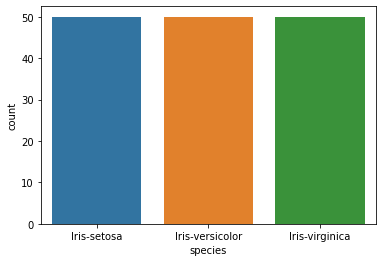

In [24]:
sns.countplot(x=df['species'])

D:\jupyter\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal_length', ylabel='species'>

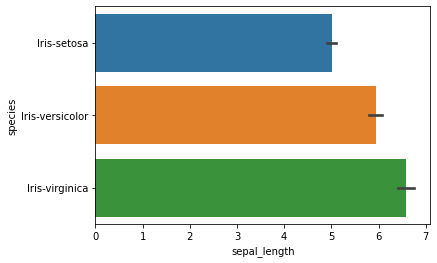

In [25]:
sns.barplot(df['sepal_length'],df['species'])

Text(0.5, 1.0, 'sepal_width vs petal_length')

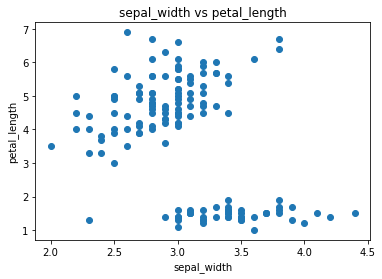

In [26]:
plt.scatter(df['sepal_width'],df['petal_length'])
plt.xlabel('sepal_width')
plt.ylabel('petal_length')
plt.title('sepal_width vs petal_length')

### SPLITTING AND TRAINING DATASET

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = 0.20, random_state = 82)


In [7]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler ()

x_train = sc.fit_transform(x_train)

x_test= sc. transform (x_test)

In [8]:
x_train

array([[-1.00251953,  1.03162171, -1.40606109, -1.20517074],
       [ 2.14105929, -0.10410861,  1.62428406,  1.19627649],
       [-0.88161265,  1.03162171, -1.34888477, -1.33858448],
       [ 0.20654925, -0.10410861,  0.59511023,  0.79603529],
       [ 0.56926988, -1.23983894,  0.70946288,  0.92944902],
       [-1.24433328,  0.12303745, -1.23453212, -1.33858448],
       [-0.76070577,  0.80447565, -1.34888477, -1.33858448],
       [-0.15617138,  3.0759363 , -1.29170844, -1.07175701],
       [-0.15617138, -0.55840074,  0.42358126,  0.12896661],
       [-0.88161265,  0.80447565, -1.29170844, -1.33858448],
       [ 0.32745613, -0.10410861,  0.65228656,  0.79603529],
       [ 0.20654925, -0.78554681,  0.7666392 ,  0.52920782],
       [ 0.69017676, -0.55840074,  1.05252082,  1.32969023],
       [ 0.56926988, -0.55840074,  0.7666392 ,  0.39579408],
       [-0.88161265,  0.57732958, -1.1773558 , -0.93834327],
       [ 2.26196617,  1.71305991,  1.68146038,  1.32969023],
       [-1.12342641, -1.

In [9]:
from sklearn.naive_bayes import GaussianNB 
nvclassifier = GaussianNB()

nvclassifier.fit(x_train, y_train)

GaussianNB()

In [10]:
y_pred=nvclassifier.predict(x_test)
y_pred

array(['Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor'], dtype='<U15')

In [17]:
y_pred=nvclassifier.predict(x_test)
y_train_pred=nvclassifier.predict(x_train)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train_pred,y_train)

0.9666666666666667

In [20]:
accuracy_score(y_pred,y_test)

0.9333333333333333

In [11]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,y_pred)
confusion

array([[11,  0,  0],
       [ 0,  8,  1],
       [ 0,  1,  9]], dtype=int64)

In [31]:
a = confusion.shape

corrPred=0

falsePred=0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=confusion[row, c]
        else:
            falsePred += confusion[row, c]
print('Correct predictions:, corrPred')

print('False predictions, falsePred')

print ('\n\nAccuracy of the Naive Bayes Clasification is:',corrPred/(confusion.sum()))



Correct predictions:, corrPred
False predictions, falsePred


Accuracy of the Naive Bayes Clasification is: 0.9333333333333333
